## The usual preamble

Note that we're instantiating the larcv IOManager. This sets up static variables which are used by the compiled software.

In [35]:
from larcv import larcv
larcv.IOManager
from ROOT import TChain
import numpy as np
import scipy.misc as smp

The snippet below should be familiar from the previous notebook.

In [36]:
roi_tree_name='partroi_tpc_hires_crop_tree'
roi_br_name=roi_tree_name.replace('tree','branch')
roi_ch = TChain(roi_tree_name)
roi_ch.AddFile('../test.root')

1

## ROI and Bounding Boxes

In [37]:
roi_ch.GetEntry(0)
roi_br=getattr(roi_ch, roi_br_name)
bb_array = roi_br.ROIArray()
bb = bb_array.at(0)
print bb.dump()

      Particle Unknown (PdgCode,TrackID) = (11,4294967295) ... with Parent (0,4294967295)
      Vertex   (x, y, z, t) = (69.1354,80.4858,630.047,1397.42)
      Momentum (px, py, pz) = (-803.985,-156.442,42.744)
      Inittial Energy = 820.178
      Deposit  Energy = 727.087
      # Bounding Box  = 3
          Plane 0 (rows,cols) = (234,162) ... Left Top (1018,4594) ... Right Bottom (1342,3190)
          Plane 1 (rows,cols) = (234,150) ... Left Top (1430,4594) ... Right Bottom (1730,3190)
          Plane 2 (rows,cols) = (234,151) ... Left Top (1930,4594) ... Right Bottom (2232,3190)




## PMT Information

In [38]:
pmt_tree_name='image2d_pmt_tree'
pmt_br_name=pmt_tree_name.replace('tree','branch')
pmt_ch = TChain(pmt_tree_name)
pmt_ch.AddFile('../test.root')

pmt_ch.GetEntry(0)
pmt_br=getattr(pmt_ch, pmt_br_name)
pmt_array = pmt_br.Image2DArray()
print pmt_array.size()
pmt_image = pmt_array.at(0)
print pmt_image.meta().dump()

1
Plane 65535 (rows,cols) = (1500,32) ... Left Top (0,1499) ... Right Bottom (32,-1)



## Painting PMT Information

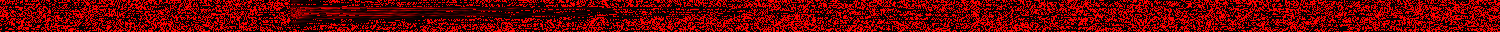

In [41]:
data = np.zeros( (32,1500,3), dtype=np.uint8 )
for i in range(1500):
    for j in range(32):
        data[j,i] = [pmt_br.at(0).pixel(i,j),0,0] 
img = smp.toimage( data )       # Create a PIL image
img.save('pmt_image.png')
from IPython.display import Image
Image(filename='pmt_image.png') 

## Segment Information

In [47]:
seg_tree_name='image2d_segment_hires_crop_tree'
seg_br_name=seg_tree_name.replace('tree','branch')
seg_ch = TChain(seg_tree_name)
seg_ch.AddFile('../test.root')

seg_ch.GetEntry(0)
seg_br=getattr(seg_ch, seg_br_name)
seg_array = seg_br.Image2DArray()
print seg_array.size()
seg_image = seg_array.at(0)
print seg_image.meta().dump()

3
Plane 0 (rows,cols) = (576,576) ... Left Top (868,5856) ... Right Bottom (2020,2400)



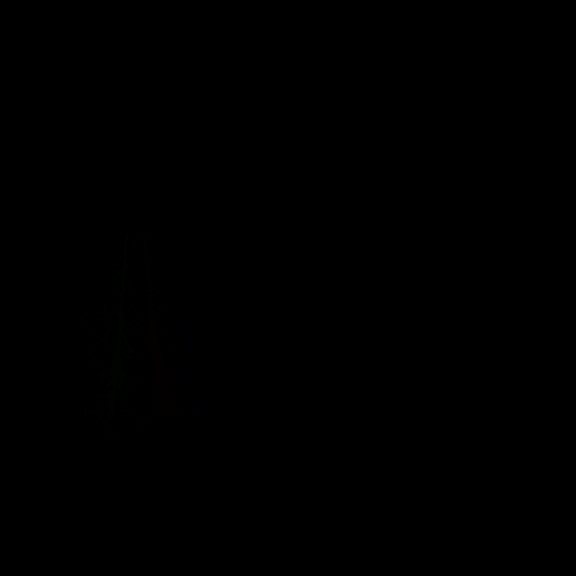

In [48]:
data = np.zeros( (576,576,3), dtype=np.uint8 )
for i in range(576):
    for j in range(576):
        data[i,j] = [seg_br.at(0).pixel(i,j),seg_br.at(1).pixel(i,j),seg_br.at(2).pixel(i,j)] 
img = smp.toimage( data )       # Create a PIL image
img.save('segment_image.png')
from IPython.display import Image
Image(filename='segment_image.png') 

## Channel Status